# Keras and TensorFlow  - MNIST Dataset (Digit Recognizer)

## Introduction

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems, and has been widely used for training and testing in the field of machine learning since its release in 1999.

In this notebook, we will be using Keras (with TensorFlow as our backend) as the main package to create a simple neural network to predict digits from handwritten images. In particular, we will be calling the Functional Model API of Keras, and creating a 4-layered and 5-layered neural network.

We will be experimenting with Stochastic Gradient Descent and Adam as the optimizers, as well as dropout, which is used to  prevent overfitting in neural networks.  However, we will not be tinkering with other parameters such as training epochs or hidden layer units.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

Using TensorFlow backend.


## Data Exploration

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

## Visualising the data

In [5]:
# visualise the label based on feature columns
# argument = row number of train dataframe
def plot_minst(row):
    # Reading mnist train dataset as a pandas dataframe
    s = pd.read_csv("train.csv")
    # Converting the pandas dataframe to a numpy matrix
    data = np.matrix(s)
    # Keep only the feature columns in the row
    data = np.delete(data, row, 1)
    # First row has 784 pixels (28*28), reshape to (28*28) np.array
    img = data[row].reshape(28,28)
    # Plot the image
    plt.imshow(img, cmap="gray")

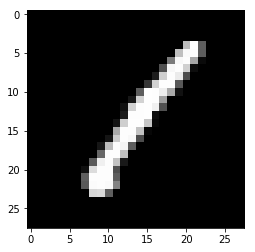

In [6]:
# visualise row 0
plot_minst(0)

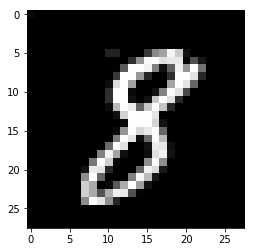

In [7]:
# visualise row 20
plot_minst(20)

## Splitting into training and validation dataset

In [8]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)

In [10]:
y_train.shape

(33600,)

In [11]:
X_train.shape

(33600, 784)

In [12]:
42000 * .8

33600.0

In [13]:
X_train = X_train.as_matrix().reshape(33600, 784)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
X_cv.shape

(8400, 784)

In [15]:
X_cv = X_cv.as_matrix().reshape(8400, 784)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [16]:
X_cv.dtype

dtype('int64')

In [17]:
X_test = X_test.as_matrix().reshape(28000, 784)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [18]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Data cleaning, normalization and selection

In [20]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features, using broadcasting. In addition, we proceed to convert our labels from a class vector to binary One Hot Encoded

In [21]:
X_train.dtype

dtype('int64')

In [22]:
# Feature Normalization 
X_train = X_train.astype('float32'); 
X_cv= X_cv.astype('float32'); 
X_test = X_test.astype('float32')

In [23]:
X_train.dtype

dtype('float32')

In [24]:
X_train /= 255
X_cv /= 255
X_test /= 255

In [25]:
# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [26]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Model Fitting


We proceed by fitting several simple neural network models using Keras (with TensorFlow as our backend) and collect their accuracy. The model that performs the best on the validation set will be used as the model of choice for the competition.

Model 1: Simple Neural Network with 4 layers (300, 100, 100, 200)

In our first model, we will use the Keras library to train a neural network with the activation function set as ReLu. To determine which class to output, we will rely on the SoftMax function.


In [27]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [28]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

In [31]:
# We rely on the plain vanilla Stochastic Gradient Descent as our optimizing methodology
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [32]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 2s - loss: 1.8541 - acc: 0.4984 - val_loss: 1.0045 - val_acc: 0.7600
Epoch 2/20
 - 3s - loss: 0.6480 - acc: 0.8298 - val_loss: 0.4634 - val_acc: 0.8729
Epoch 3/20
 - 3s - loss: 0.4090 - acc: 0.8835 - val_loss: 0.3615 - val_acc: 0.8979
Epoch 4/20
 - 3s - loss: 0.3372 - acc: 0.9026 - val_loss: 0.3119 - val_acc: 0.9104
Epoch 5/20
 - 3s - loss: 0.2978 - acc: 0.9138 - val_loss: 0.2891 - val_acc: 0.9170
Epoch 6/20
 - 3s - loss: 0.2683 - acc: 0.9228 - val_loss: 0.2650 - val_acc: 0.9240
Epoch 7/20
 - 3s - loss: 0.2452 - acc: 0.9296 - val_loss: 0.2556 - val_acc: 0.9260
Epoch 8/20
 - 3s - loss: 0.2272 - acc: 0.9352 - val_loss: 0.2321 - val_acc: 0.9340
Epoch 9/20
 - 3s - loss: 0.2101 - acc: 0.9376 - val_loss: 0.2175 - val_acc: 0.9363
Epoch 10/20
 - 3s - loss: 0.1952 - acc: 0.9437 - val_loss: 0.2053 - val_acc: 0.9396
Epoch 11/20
 - 3s - loss: 0.1828 - acc: 0.9469 - val_loss: 0.1955 - val_



Using a 4 layer neural network with:
- 20 training epochs
- A training batch size of 100
- Hidden layers set as (300, 100, 100, 200)
- Learning rate of 0.1

Achieved a training score of around 96-98% and a test score of around 95 - 97%.

Can we do better if we were to change the optimizer? To find out, we use the Adam optimizer for our second model, while maintaining the same parameter values for all other parameters.


In [33]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology
adam = keras.optimizers.Adam(lr=learning_rate)
model2 = Model(Inp, output)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 5s - loss: 0.3393 - acc: 0.8984 - val_loss: 0.1621 - val_acc: 0.9501
Epoch 2/20
 - 4s - loss: 0.1270 - acc: 0.9601 - val_loss: 0.1280 - val_acc: 0.9613
Epoch 3/20
 - 4s - loss: 0.0829 - acc: 0.9744 - val_loss: 0.1099 - val_acc: 0.9660
Epoch 4/20
 - 4s - loss: 0.0618 - acc: 0.9792 - val_loss: 0.1282 - val_acc: 0.9623
Epoch 5/20
 - 4s - loss: 0.0448 - acc: 0.9854 - val_loss: 0.1059 - val_acc: 0.9685
Epoch 6/20
 - 4s - loss: 0.0390 - acc: 0.9867 - val_loss: 0.1047 - val_acc: 0.9721
Epoch 7/20
 - 4s - loss: 0.0338 - acc: 0.9888 - val_loss: 0.1142 - val_acc: 0.9710
Epoch 8/20
 - 4s - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0920 - val_acc: 0.9755
Epoch 9/20
 - 4s - loss: 0.0216 - acc: 0.9930 - val_loss: 0.1145 - val_acc: 0.9740
Epoch 10/20
 - 4s - loss: 0.0255 - acc: 0.9918 - val_loss: 0.1185 - val_acc: 0.9706
Epoch 11/20
 - 4s - loss: 0.0168 - acc: 0.9941 - val_loss: 0.1162 - val_acc: 0.9737
Epoch 12/20
 - 4s - loss: 0.0195 - a



As it turns out, it does appear to be the case that the optimizer plays a crucial part in the validation score. In particular, the model which relies on 'Adam' as its optimizer tend to perform 1.5 - 2.5% better on average. Going forward, we will use 'Adam' as our optimizer of choice.

Let us see the impact of changing the learning rate from 0.1 to 0.01 on the model accuracy, using Model 2A.  We will keep 'Adam' as the optimizer.

In [35]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = keras.optimizers.Adam(lr=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 2,
                        validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 5s - loss: 0.3382 - acc: 0.8984 - val_loss: 0.2037 - val_acc: 0.9375
Epoch 2/20
 - 4s - loss: 0.1242 - acc: 0.9607 - val_loss: 0.1300 - val_acc: 0.9607
Epoch 3/20
 - 4s - loss: 0.0817 - acc: 0.9747 - val_loss: 0.0971 - val_acc: 0.9695
Epoch 4/20
 - 4s - loss: 0.0599 - acc: 0.9805 - val_loss: 0.0884 - val_acc: 0.9746
Epoch 5/20
 - 4s - loss: 0.0480 - acc: 0.9847 - val_loss: 0.1097 - val_acc: 0.9695
Epoch 6/20
 - 4s - loss: 0.0332 - acc: 0.9894 - val_loss: 0.1161 - val_acc: 0.9680
Epoch 7/20
 - 4s - loss: 0.0336 - acc: 0.9885 - val_loss: 0.0990 - val_acc: 0.9737
Epoch 8/20
 - 4s - loss: 0.0302 - acc: 0.9901 - val_loss: 0.1007 - val_acc: 0.9739
Epoch 9/20
 - 4s - loss: 0.0183 - acc: 0.9942 - val_loss: 0.1190 - val_acc: 0.9719
Epoch 10/20
 - 4s - loss: 0.0179 - acc: 0.9944 - val_loss: 0.1288 - val_acc: 0.9704
Epoch 11/20
 - 4s - loss: 0.0216 - acc: 0.9925 - val_loss: 0.1219 - val_acc: 0.9726
Epoch 12/20
 - 4s - loss: 0.0200 - a

Chaning the learning rate from 0.1 to 0.01 had a negligible effect on model accuracy.  As such, going forward we will stick with the default learning rate of 0.01.

We proceed to fit a neural network with 5 hidden layers with the features in the hidden layer set as (300, 100, 100, 100, 200) respectively. To ensure that the two models are comparable, we will set the training epochs as 20, and the training batch size as 100.


In [37]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [38]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [39]:
# Our model would have '7' layers - input layer, 5 hidden layer and 1 output layer
model3 = Model(Inp, output)
model3.summary() # We have 308,010 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total para

In [40]:
# We rely on 'Adam' as our optimizing methodology
adam = keras.optimizers.Adam(lr=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 6s 180us/step - loss: 0.3550 - acc: 0.8940 - val_loss: 0.1763 - val_acc: 0.9488
Epoch 2/20
33600/33600 [==============================] - 4s 126us/step - loss: 0.1309 - acc: 0.9588 - val_loss: 0.1341 - val_acc: 0.9556
Epoch 3/20
33600/33600 [==============================] - 4s 127us/step - loss: 0.0870 - acc: 0.9721 - val_loss: 0.1046 - val_acc: 0.9700
Epoch 4/20
33600/33600 [==============================] - 4s 125us/step - loss: 0.0631 - acc: 0.9805 - val_loss: 0.1127 - val_acc: 0.9650
Epoch 5/20
33600/33600 [==============================] - 4s 125us/step - loss: 0.0508 - acc: 0.9831 - val_loss: 0.1136 - val_acc: 0.9676
Epoch 6/20
33600/33600 [==============================] - 4s 125us/step - loss: 0.0434 - acc: 0.9861 - val_loss: 0.1460 - val_acc: 0.9602
Epoch 7/20
33600/33600 [==============================] - 4s 126us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.1519 - v



Compared to our first model, adding an additional layer did not significantly improve the accuracy from our previous model. However, there are computational costs (in terms of complexity) in implementing an additional layer in our neural network. Given that the benefits of an additional layer are low while the costs are high, we will stick with the 4 layer neural network.

We now proceed to include dropout (dropout rate of 0.3) in our second model to prevent overfitting.


In [42]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [43]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(rate=0.7)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(rate=0.7)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(rate=0.7)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [44]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model4 = Model(Inp, output)
model4.summary() # We have 297,910 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

In [45]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
history = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 7s 215us/step - loss: 1.6812 - acc: 0.3824 - val_loss: 0.7884 - val_acc: 0.7460
Epoch 2/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.9123 - acc: 0.6985 - val_loss: 0.5103 - val_acc: 0.8381
Epoch 3/20
33600/33600 [==============================] - 5s 154us/step - loss: 0.7058 - acc: 0.7839 - val_loss: 0.3519 - val_acc: 0.9011
Epoch 4/20
33600/33600 [==============================] - 5s 154us/step - loss: 0.5865 - acc: 0.8300 - val_loss: 0.3580 - val_acc: 0.8814
Epoch 5/20
33600/33600 [==============================] - 5s 156us/step - loss: 0.5312 - acc: 0.8487 - val_loss: 0.2688 - val_acc: 0.9271
Epoch 6/20
33600/33600 [==============================] - 6s 166us/step - loss: 0.4922 - acc: 0.8613 - val_loss: 0.2610 - val_acc: 0.9310
Epoch 7/20
33600/33600 [==============================] - 6s 166us/step - loss: 0.4557 - acc: 0.8739 - val_loss: 0.2411 - v

When we included a drop out rate of 0.3 to the model, the model accuracy dropped markedly from 99% to circa 95%, which is not surprising.  The tradeofff here is that we can expect the model with the drop out rate to be less prone to overfitting.  

## Summary & Conclusion
In this classification exercise of MNIST data, we used Keras with TensorFlow as the backend, and tested the impact of tweaking the parameters on model accuracy.

We found that tinkering with the learning rate and number of neuron layers did not offer significant improvement to model accuracy.  However, using Adam instead of Stochastic Gradient Descent as the optimizer did translate into meaningful improvement in accuracy.

We also tested the impact of introducing a dropout rate to the model, to reduce overfitting, and found that the model accuracy degraded significantly, which is to be expected as a trade-off to reducing the risk of curve fitting.